# Black-Scholes Model and Monte Carlo Simulation Option Pricing Comparison 

**Author:** Alexander Stephan   
**Date:** July 2, 2025

# Project Overview and Background Information
The purpose of this project is to develop models to accurately price European options using the Black-Scholes Model and a Monte Carlo simulation, and determine the option's Greeks (Delta, Gamma, Vega, Theta, Rho) 

## European Options
An option is a derivative that gives the owner **the right to buy or sell an asset at a predetermined strike price at a set date.** Put options give the owner the right to **sell** the asset and call options give the owner the right to **buy** at the strike price. While American options can be exercised any time before the option expires, **European options can only be exercised on the expiration date.** For the purposes of this project, only European options will be considered.

The buyers of options are said to be in a **long position** where the investor has the right to buy or sell a stock, while the writer of the option is in a **short position** (owes the rights to buy/sell to another investor).

## Black-Scholes Model
The Black-Scholes model is a mathematical model developed to **price European options from the buyer's (long position) perspective.** It argues that stock prices follow **geometric brownian motion and prices follow a lognormal distribution.** The Black-Scholes Model is as follows:

### Black-Scholes Partial Differential Equation
$\large\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0$  

Where: $V(S,t) =$ Value of a European option

### Particular Solutions
European Call Option:
$\large C(S, t) = S N(d_1) - K e^{-r (T - t)} N(d_2)$

European Put Option: 
$\large P(S, t) = K e^{-r (T - t)} N(-d_2) - S N(-d_1)$

Where:
- $ d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left( r + \frac{1}{2} \sigma^2 \right)(T - t)}{\sigma \sqrt{T - t}}$
  
- $ d_2 = d_1 - \sigma \sqrt{T - t}$

- $C(S,t) =$ Price of a European call option
- $P(S,t) =$ Price of a European put option
- $N =$ Standard Normal Cumulative Distribution Function (the probability a value falls at or below x in a standardized normal distribution)

### Variables
- $S =$ Current price of stock
- $K =$ Strike price
- $r =$ Risk-free interest rate
- $\sigma =$ Asset volatility
- $t =$ Current time ($t = 0$ is "now")
- $T =$ Expiration time

### Terminal Conditions
At expiration (t = T), the options value is determined by its payoff:
- Call: $V(S,T) = max(S-K, 0)$
- Put: $V(S,T) = max(K-S, 0)$

Economic Interpretation:
- For a **call option** at the time of expiration, if the current value of the stock is greater than the strike price, the option holder will exercise the option, buying the shares at the strike price, then selling them at the market price, profiting the difference. Otherwise, the option is not exercised and is worthless.
- For a **put option**, the option owner profits if the stock price falls below the strike price, otherwise the option expires worthless.

### Assumptions of the Black-Scholes Model
1. The option is European (exercisable only at expiration).
2. There are no transaction costs or taxes. No dividends are paid during the option's life.
3. There is no impactful arbitrage.
4. The volatility and risk-free rate are known and constant.
5. The stock price follows a geometric Brownian motion.
6. Returns are normally distributed, and markets are efficient.

### Limitations of the Black-Scholes Model
1. **Constant Stock Volatility:** Real-world stocks have changing, non-constant volatility, inconsistent with the assumptions of the Black-Scholes Model.
2. **Implied Volatility:** The Black-Scholes Model requires volatility as an input, but cannot predict it. Implied volatility has to be inferred from market prices.
3. **Geometric Brownian Motion:** The model assumes stock prices follow this process, but they often do not.
4. **European Options Only:** The Black-Scholes Model only prices European-style options, not options that can be exercised before expiration.
5. **No Dividends or Transaction Fees:** The Black-Scholes model does not incorporate dividends or transaction costs, which affect option values.

## Option Greeks
The option greeks are variable measures of **how sensitive an option price is to its underlying paramaters.** Each greek is a partial derivatives of the particular solutions to the Black-Scholes Model, **providing insight into the risks and sensitivities** of holding options. These measures are fundamental for risk management and hedging.

### Greek Summaries:

- **Delta:** Sensitivity of option value to stock price  
  $\large\Delta = \frac{\partial V}{\partial S}$
- **Gamma:** Sensitivity of Delta to stock price  
  $\large\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}$
- **Vega:** Sensitivity of option value to stock volatility  
  $\large\nu = \frac{\partial V}{\partial \sigma}$
- **Theta:** Sensitivity of option value to time to maturity  
  $\large\theta = \frac{\partial V}{\partial t}$
- **Rho:** Sensitivity of option value to interest rate (risk-free rate)  
  $\large\rho = \frac{\partial V}{\partial r}$

### Greek Definitions:

- **Delta ($\Delta$):** Delta expresses how much the value of an option will change when the price of the underlying asset increases by \$1. In practice, delta provides investors information on whether an option will be profitable and how to hedge their options. Delta ranges from 0 to 1 for call options and from -1 to 0 for put options, with the magnitude of delta approximating the probability of the option finishing in-the-money. Using a delta spread, where the initial positive and negative deltas sum to 0, a trader can hedge to reduce risk, expecting a small profit if the stock price does not greatly change.
- **Gamma ($\Gamma$):** Gamma measures the rate of change of delta with respect to the underlying asset’s price. A higher gamma signals a higher sensitivity to price changes, which is most pronounced for at-the-money options nearing expiration. Gamma provides investors an important tool in controlling risk in their portfolio, as it helps predict how hedges will need to be adjusted in response to market movements.
- **Vega ($\nu$):** Vega measures how much an option's price is expected to change when implied volatility changes by 1 percentage point. Both call and put options have positive vegas because the price of options increases as implied volatility does. Vega is highest when the option's outcome is most uncertain: when an option is near its strike price or far from expiration. Investors use vega to manage and hedge exposure to volatility or speculate on changes in implied volatility.
- **Theta ($\theta$):** Theta estimates the daily depreciation of an option if stock price and volatility remain constant. Theta is usually negative for long options, indicating the loss of value as an option approaches its expiration. The effect has the greatest magnitude for at-the-money options near their dates of expiration. Incorporating theta into their hedges helps investors manage the impact of depreciation in their portfolio.
- **Rho ($\rho$):** Rho gauges the estimated change in option value for a one percent change in the risk-free-rate (often assumed to be the interest rate). Rho is greatest for options in-the-money and lowest for options out-of-the-money. However, changes in interest rates generally have a minor impact on option prices, so rho is considered less important than the other greeks.

## Monte Carlo Method
The Monte Carlo Method models the various outcomes of a process and their associated probabilities. Applied to options, a Monte Carlo simulation generates random outcomes based on the assumed geometric brownian motion of the asset. Repeating this process many times, the outcome of the option can be predicted and factors such as risk can be evaluated. In this project, the Monte Carlo simulation will use the risk-free rate instead of the standard deviation of the returns because it was previously assumed in the Black-Scholes section that there is no arbitrage and the asset grows at the risk-free rate. 

### Steps:
1. To create a possible outcome, start by calculating the the daily logarithmic returns of the stock over the course of a short period prior to the start date.
2. Next, calculate the variance of the returns, using it to calculate the drift according to the following equation:  
   $\large\text{Drift} = (R_f - \frac{s^2}{2}) * \Delta t$ 
   Where:  
   - $R_f =$ Risk-free rate 
   - $s^2 =$ variance of the daily logarithmic returns
   - $\Delta t =$ Time increment $\Delta t = \text{number of time steps}/\text{period in years}$. In this simulation, $\Delta t = 1/252$
3. After calculating drift, obtain a random value using the inverse norm function and a random number:  
    $\large\text{Random Value} = s * N^{-1}(\text{RAND(0,1)}) * \sqrt{\Delta t}$  
   Where:  
   - $s =$ standard deviation of the daily log returns
   - $N^{-1} =$ Inverse standardized normal distribution function
   - $\text{RAND(0,1)} =$ Random number function, generating random number between 0 and 1 (non-inclusive)
4. Finally, find the next day's price according to the following formula and repeat for the duration of the simulation, performing multiple possible outcomes to create a Monte Carlo simulation.
   $\text{Tomorrow's Price} = \text{Today's Price}*e^{\text{Drift} + \text{Random Value}}$

### Option Valuation
By analyzing the simulated asset price outcomes of the monte carlo simulation, the expected payoff and thus the price of the option can be calculated.

First, recall the terminal conditions of an option:
- Call: $V(S,T) = max(S-K, 0)$
- Put: $V(S,T) = max(K-S, 0)$
  
Depending on the type of option, strike price, and current price, an option will either have a positive payoff where the option is exercised or the option will expire and have a payoff of 0. Applying this concept to the simulated paths of the monte carlo simulation, the expected payoff can be determined by calculating the payoff for each simulation and taking the arithmetic mean:

$\large E_{\text{payoff}} = \frac{1}{n}\sum\limits^n_{i=1}{\text{payoff}_i}$  
Where:  
- $n =$ Number of simulated paths

Finally, to value the option, the expected payoff is discounted to reflect present value using the risk-free rate:

$V = e^{-rT} * E_{\text{payoff}}$  
Where:
- $T =$ Time to expiration in years


# Black-Scholes Pricing Function

In this section, a function is created that takes in the stock ticker of the underlying asset, the strike price, the duration in trading days until the option expires, and the type of option and **returns the value of the option according to the Black-Scholes model.**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from scipy.stats import norm

def bsm(ticker, strike_price, duration_trading_days, option_type):
    """
    Price a European option using the Black-Scholes model.

    Parameters:
        ticker (str): Option stock ticker symbol
        strike_price (float): Option strike price
        duration_trading_days (int): Time to expiration in trading days
        option_type (str): "call" or "put"

    Returns:
        value (float): value of the option (per share)
    """
    
    # Ensuring input variables are as expected
    if (type(strike_price) != float) and (type(strike_price) != int) and (type(strike_price) != np.float64):
        raise ValueError("strike_price must be float or int")
    if type(duration_trading_days) != int:
        raise ValueError("duration_trading_days must be integer")
    if (option_type != "call") and (option_type != "put"):
        raise ValueError("option_type must be \"call\" or \"put\"")
    
    # Retrieving historical stock data from yf to estimate implied volatility and acquire current price
    # The annualized volatility for the stock will be use to approximate the implied volatility
    # A period of 22 trading days (about a month) is used to approximate an implied volatility most representative of the present
    stock_info = yf.download(
        ticker,
        period = "22d",
        auto_adjust = True,
        progress = False
    )

    # Calculating annual volatility using daily log returns
    prices = np.array(stock_info["Close"])
    
    log_returns = np.log(prices[1:]/prices[:-1])
    daily_volatility = np.std(log_returns, ddof = 1)
    annual_volatility = daily_volatility * np.sqrt(252)

    # Getting current price
    current_price = yf.Ticker(ticker).history(interval = "1m", period = "1d")["Close"].iloc[-1]

    # Getting US 10-year treasury bond interest rate to use as risk-free rate
    rf_rate = yf.Ticker("^TNX").history(interval = "1m", period = "1d")["Close"].iloc[-1]/100
    
    # Converting duration into years (assume 252 trading days per trading year)
    duration_trading_years = duration_trading_days/252
    
    # Calculating d_1 and d_2 from the particular solutions of the BSM
    # Step-by-step vectorized calculation
    ln_term = np.log(current_price/strike_price)
    vol_squared = np.power(annual_volatility, 2)
    numerator = ln_term + np.multiply(rf_rate + .5 * vol_squared, duration_trading_years)
    denominator = np.multiply(annual_volatility,np.sqrt(duration_trading_years))
    d_1 = numerator / denominator
    d_2 = d_1 - denominator

    
    # Creating two cases for determining the price of an option, one for call options and one for put options
    match option_type:
        case "call":
            term1 = np.multiply(current_price, norm.cdf(d_1))
            term2 = strike_price * np.exp(-rf_rate * duration_trading_years) * norm.cdf(d_2)
            value = term1 - term2
        case "put":
            term1 = strike_price * np.exp(-rf_rate * duration_trading_years) * norm.cdf(-d_2)
            term2 = np.multiply(current_price, norm.cdf(-d_1))
            value = term1 - term2

    # Returning the price of the option according to the BSM
    return value  

# Greeks Calculating Function

Using the same inputs as the Black-Scholes option pricing function, a function is created that **returns the greek values for the option.**

In [2]:
def greeks(ticker, strike_price, duration_trading_days, option_type):
    """
    Calculate the option greeks for an option according to the Black-Scholes model.

    Parameters:
        ticker (str): Option stock ticker symbol
        strike_price (float): Option strike price
        duration_trading_days (int): Time to expiration in trading days
        option_type (str): "call" or "put"

    Returns:
        greeks (DataFrame): values of Delta, Gamma, Vega, Theta, and Rho for option (per share)
    """
    
    # Ensuring input variables are as expected
    if (type(strike_price) != float) and (type(strike_price) != int) and (type(strike_price) != np.float64):
        raise ValueError("strike_price must be float or int")
    if type(duration_trading_days) != int:
        raise ValueError("duration_trading_days must be integer")
    if (option_type != "call") and (option_type != "put"):
        raise ValueError("option_type must be \"call\" or \"put\"")
    
    # Retrieving historical stock data from yf to estimate implied volatility and acquire current price
    # The annualized volatility for the stock will be use to approximate the implied volatility
    # A period of 22 trading days (about a month) is used to approximate an implied volatility most representative of the present
    stock_info = yf.download(
        ticker,
        period = "22d",
        auto_adjust = True,
        progress = False
    )
    # Calculating annual volatility using daily log returns
    prices = np.array(stock_info["Close"])
    
    log_returns = np.log(prices[1:]/prices[:-1])
    daily_volatility = np.std(log_returns, ddof = 1)
    annual_volatility = daily_volatility * np.sqrt(252)

    # Getting current price
    current_price = yf.Ticker(ticker).history(interval = "1m", period = "1d")["Close"].iloc[-1]

    # Getting US 10-year treasury bond interest rate to use as risk-free rate
    rf_rate = yf.Ticker("^TNX").history(interval = "1m", period = "1d")["Close"].iloc[-1]/100
    
    # Converting duration into years (assume 252 trading days per trading year)# Converting duration into years
    duration_trading_years = duration_trading_days/252
    
    # Calculating d_1 and d_2 from the particular solutions of the BSM
    # Step-by-step vectorized calculation
    ln_term = np.log(current_price/strike_price)
    vol_squared = np.power(annual_volatility, 2)
    numerator = ln_term + np.multiply(rf_rate + .5 * vol_squared, duration_trading_years)
    denominator = np.multiply(annual_volatility,np.sqrt(duration_trading_years))
    d_1 = numerator / denominator
    d_2 = d_1 - denominator

    # Calculating greeks dependent on option_type
    # Vega and gamma are the same for either type
    vega = current_price * norm.pdf(d_1) * np.sqrt(duration_trading_years)
    gamma = norm.pdf(d_1)/(current_price * annual_volatility * np.sqrt(duration_trading_years))
    match option_type:
        case "call":
            delta = norm.cdf(d_1)
            theta = -(current_price * norm.pdf(d_1) * annual_volatility)/(2 * np.sqrt(duration_trading_years)) - rf_rate * strike_price * np.exp(-rf_rate * duration_trading_years) * norm.cdf(d_2)
            rho = strike_price * duration_trading_years * np.exp(-rf_rate * duration_trading_years) * norm.cdf(d_2)
        case "put":
            delta = norm.cdf(d_1) - 1
            theta = -(current_price * norm.pdf(d_1) * annual_volatility)/(2 * np.sqrt(duration_trading_years)) + rf_rate * strike_price * np.exp(-rf_rate * duration_trading_years) * norm.cdf(-d_2)
            rho = -strike_price * duration_trading_years * np.exp(-rf_rate * duration_trading_years) * norm.cdf(-d_2)

    # Returning the option greeks in a DataFrame
    greeks = pd.DataFrame({
        "delta": [delta],
        "gamma": [gamma],
        "theta": [theta],
        "vega": [vega],
        "rho": [rho]})
    return greeks

# Monte Carlo Simulation Function

Modelling a stock's price, using **geometric Brownian motion,** this function simulates a number of **possible outcomes** over the time duration.

In [3]:
def mcs(ticker, duration_trading_days, trial_count):
    """
    Perform a Monte Carlo simulation for a stock
    
    Parameters:
        ticker (str): Option stock ticker symbol
        duration_trading_days (int): simulation length in trading days
        trial_count (int): Number of possible outcomes computed

    Returns:
        results (array): price of the stock in each day for each computed possible outcome
    """

    # Ensuring input variables are as expected
    if type(duration_trading_days) != int:
        raise ValueError("duration_trading_days must be integer")
    if type(trial_count) != int:
        raise ValueError("trial_count must be integer")

        
    # Retrieving historical stock data from yf to estimate implied volatility and acquire current price
    # The annualized volatility for the stock will be use to approximate the implied volatility
    # A period of 22 trading days (about a month) is used to approximate an implied volatility most representative of the present
    stock_info = yf.download(
        ticker,
        period = "22d",
        auto_adjust = True,
        progress = False
    )

    # Calculating annual volatility using daily log returns
    prices = np.array(stock_info["Close"])
    
    log_returns = np.log(prices[1:]/prices[:-1])
    daily_volatility = np.std(log_returns, ddof = 1)
    annual_volatility = daily_volatility * np.sqrt(252)

    # Getting current price
    current_price = yf.Ticker(ticker).history(interval = "1m", period = "1d")["Close"].iloc[-1]

    # Getting US 10-year treasury bond interest rate to use as risk-free rate
    rf_rate = yf.Ticker("^TNX").history(interval = "1m", period = "1d")["Close"].iloc[-1]/100
    
    # Calculating Drift
    drift = (rf_rate - ((annual_volatility ** 2)/2)) * 1/252

    # Pre-allocating NumPy Array for Optimization
    # Creating a NumPy array with dimensions trials_count x duration_trading_days + 1 (+1 because starting price is always current_price)
    results = np.zeros((trial_count, duration_trading_days + 1))

    # Setting each first value to the current price
    results[:, 0] = current_price

    # Generating all random numbers at once
    rand_vals = norm.ppf(np.random.uniform(1e-10, 1.0, size = (trial_count, duration_trading_days)))

    # Vectorized Monte Carlo Process
    for day in range(1, duration_trading_days + 1):
        results[:, day] = results[:, day - 1] * np.exp(drift + annual_volatility * np.sqrt(1/252) * rand_vals[:, day - 1])

    # Returning the results array
    return results

# Monte Carlo Graphing Function:

This function **graphs the possible paths,** generated by the Monte Carlo simulation.

In [4]:
def mcg(results):
    """
    Graph the results of a Monte Carlo simulatiom

    Parameter:
        results (array): price of the stock in each day for each computed possible outcome

    Returns:
        graphs Monte Carlo simulation, no returns
    """
  
     # Ensuring input variable is as expected
    if type(results) != np.ndarray:
        raise ValueError("results must be a NumPy array")
    
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(results.T)
    ax.set_xlabel("Day")
    ax.set_ylabel("Simulated Price")
    ax.set_title("Monte Carlo Simulation Paths")
    plt.axhline(y=results[0,0], color='white', linewidth=2, linestyle = "--", label = "Current Price")
    ax.set_xlim(0, len(results.T) - 1)
    plt.legend(loc = "upper left", facecolor = "#abb2b9")

# Monte Carlo Option Pricing Function

Utilyzing the payoff formulas for options, each of the **invidividual simulated paths can be evaluated,** averaging and adjusting those payoffs to determine the **expected value of the option.**

In [5]:
def mcp(results, strike_price, option_type):
    """
    Adjusted expected payoff (value) of an option according to the Monte Carlo simulation

    Parameter:
        results (array): price of the stock in each day for each computed possible outcome
        strike_price (float): Option strike price
        option_type (str): "call" or "put"

    Returns:
        value (float): value of the option
    """

    # Ensuring input variables are as expected
    if type(results) != np.ndarray:
        raise ValueError("results must be a NumPy array")
    if (type(strike_price) != float) and (type(strike_price) != int) and (type(strike_price) != np.float64):
        raise ValueError("strike_price must be float or int")
    if (option_type != "call") and (option_type != "put"):
        raise ValueError("option_type must be \"call\" or \"put\"")

    # Getting US 10-year treasury bond interest rate to use as risk-free rate
    rf_rate = yf.Ticker("^TNX").history(interval = "1m", period = "1d")["Close"].iloc[-1]/100

    # Creating 2 cases for the 2 option types
    match option_type:
        case "call":
            # Creating an array with the final prices of all exercised options
            exercised = results[:,-1]
            exercised = exercised[exercised > strike_price]
            # Finding the sum of the exercised options
            psum = np.subtract(exercised.sum(), np.multiply(strike_price,len(excrcised)))
        case "put":
            exercised = results[:,-1]
            exercised = exercised[exercised < strike_price]
            psum = np.subtract(np.multiply(strike_price,len(exercised)),exercised.sum())
    # Calculating the expected payoff
    pexp = np.divide(psum,len(results[:,-1]))
    # Discounting the payoff
    padj = np.multiply(np.exp(np.multiply(-rf_rate,np.divide(len(results[1])-1,252))),pexp)
    # Returning the payoff/value of the option
    return padj

# Comparing Black-Scholes and Monte Carlo Pricing Functions

Comparing the Monte Carlo simulation against the Black-Scholes model can provide further insight into the **efficiency of the simulation.** To evaluate the simulation's error, it will be tested against the **Black-Scholes model, serving as a benchmark.** The simulation will be tested using a **variety of strike prices** ranging from 80-120% of the current price in increments of 5% **and durations** spanning 1-5 trading days, 1-4 weeks, and 1-6 months. Using the simulated values for these options, each directional error will be plotted to a **durations x strike prices heat map.** First, the values of the options according the Black-Scholes model and Monte Carlo simulation will be **plotted against one another to visually determine their similarity.**

In [6]:
# Creating a plot that graphs the value of an option using Monte Carlo vs. value of option determined using Black_Scholes
# Taken on July 15th at 1:07 PM EST
current_price = yf.Ticker("MSFT").history(interval = "1m", period = "1d")["Close"].iloc[-1]

# Strike prices will range from 80-120% of the current price in increments of 5%
strike_prices = [round(x/100 * current_price, 4) for x in range(80, 125, 5)]

# Durations will be split into 3 types: short-term, medium-term, and long-term
# Short-term: 1-5 trading days
durations = list(range(1,6))

# Medium-term: 1-4 weeks
durations = durations + list(range(6,22,5))

# Long-term: 1-6 Months
durations = durations + list(range(26, 127, 20))

# Creating DataFrames to hold the values of the pricing model
# Format will be strike_prices X durations with a duplet in each cell (BSM price, MCM price)
prices_call = pd.DataFrame(index = durations, columns = strike_prices);
prices_put = pd.DataFrame(index = durations, columns = strike_prices);

# Populating DataFrame with duplets (BSM price, MCM price) for the column strike price and row duration
for duration in durations:
    for strike_price in strike_prices:
        prices_call.at[duration, strike_price] = (bsm("MSFT", strike_price, duration, "call"), mcp(mcs("MSFT", duration, 10000), strike_price, "call"))
        prices_put.at[duration, strike_price] = (bsm("MSFT", strike_price, duration, "put"), mcp(mcs("MSFT", duration, 10000), strike_price, "put"))
prices_call.to_csv("call.csv")
prices_put.to_csv("put.csv")

## Example Monte Carlo Simulation Graph

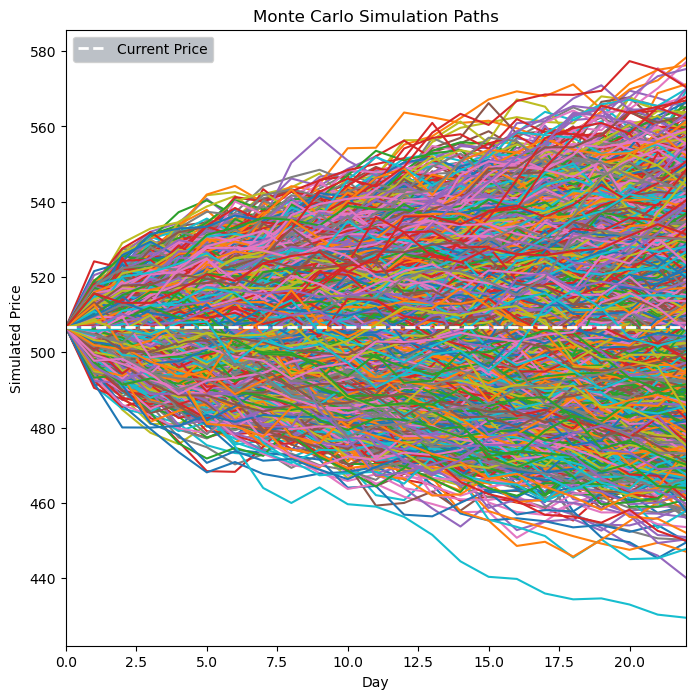

In [7]:
# Plotting an example Monte Carlo simulation
mcg(mcs("MSFT", 22, 10000))

## Visual Representation of Error (Similar to QQ Plot)

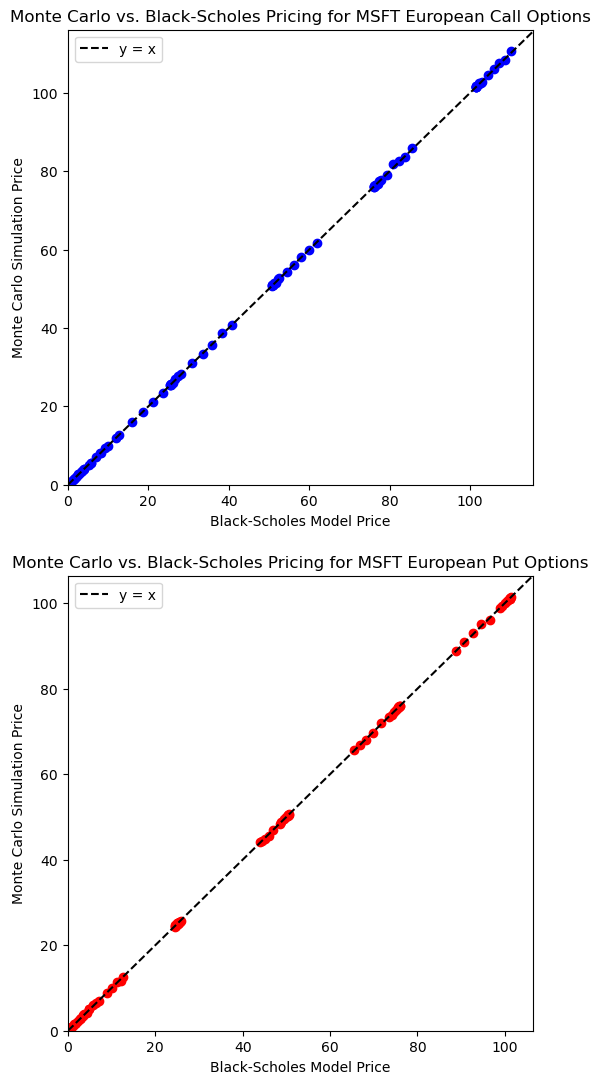

In [8]:
# Extracting values from tuples in DataFrame to graph
bsm_call_prices = prices_call.map(lambda x: x[0])
mc_call_prices = prices_call.map(lambda x: x[1])
bsm_put_prices = prices_put.map(lambda x: x[0])
mc_put_prices = prices_put.map(lambda x: x[1])

# Setting up MC vs. BS pricing graphs
fig, axs = plt.subplots(2, 1, figsize = (6, 13))

# Graphing call prices
ax = plt.subplot(2, 1, 1)
plt.ylabel("Monte Carlo Simulation Price")
plt.xlabel("Black-Scholes Model Price")
plt.title("Monte Carlo vs. Black-Scholes Pricing for MSFT European Call Options")
plt.axline((0, 0), slope=1, color='black', linestyle='--', label = "y = x")
plt.scatter(bsm_call_prices, mc_call_prices, color = "blue")
plt.legend()
ax.set_xlim(0)
ax.set_ylim(0)

# Graphing put prices
ax = plt.subplot(2, 1, 2)
plt.ylabel("Monte Carlo Simulation Price")
plt.xlabel("Black-Scholes Model Price")
plt.title("Monte Carlo vs. Black-Scholes Pricing for MSFT European Put Options")
plt.axline((0, 0), slope=1, color='black', linestyle='--', label = "y = x")
plt.scatter(bsm_put_prices, mc_put_prices, color = "red")
plt.legend()
ax.set_xlim(0)
ax.set_ylim(0);

As shown in the graphs, **all points roughly fall on the line y = x.** This finding indicates that the Monte Carlo simulation approximates the value of an option similarly to the Black-Scholes model and suggests that **error may be negligeable.**

## Error Heat Maps

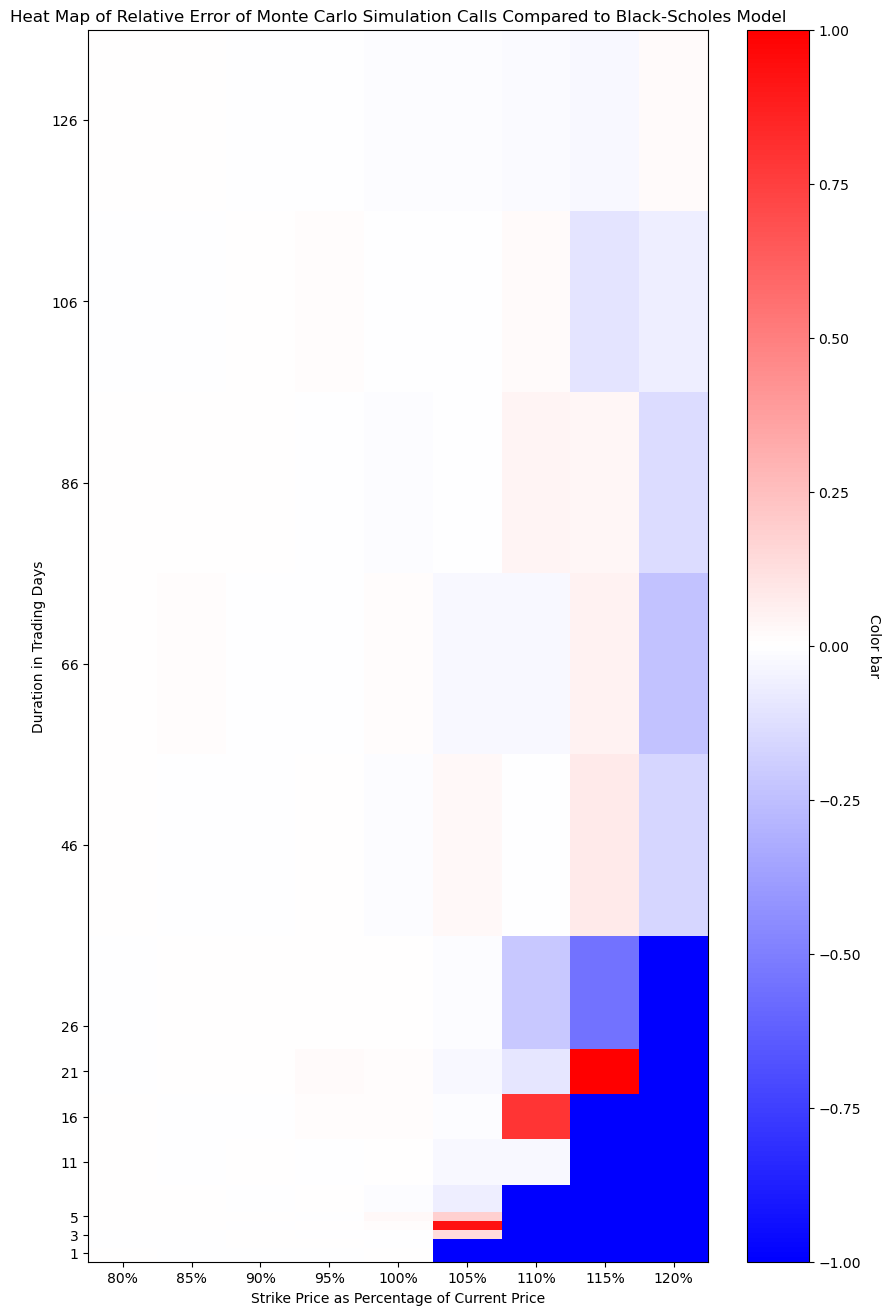

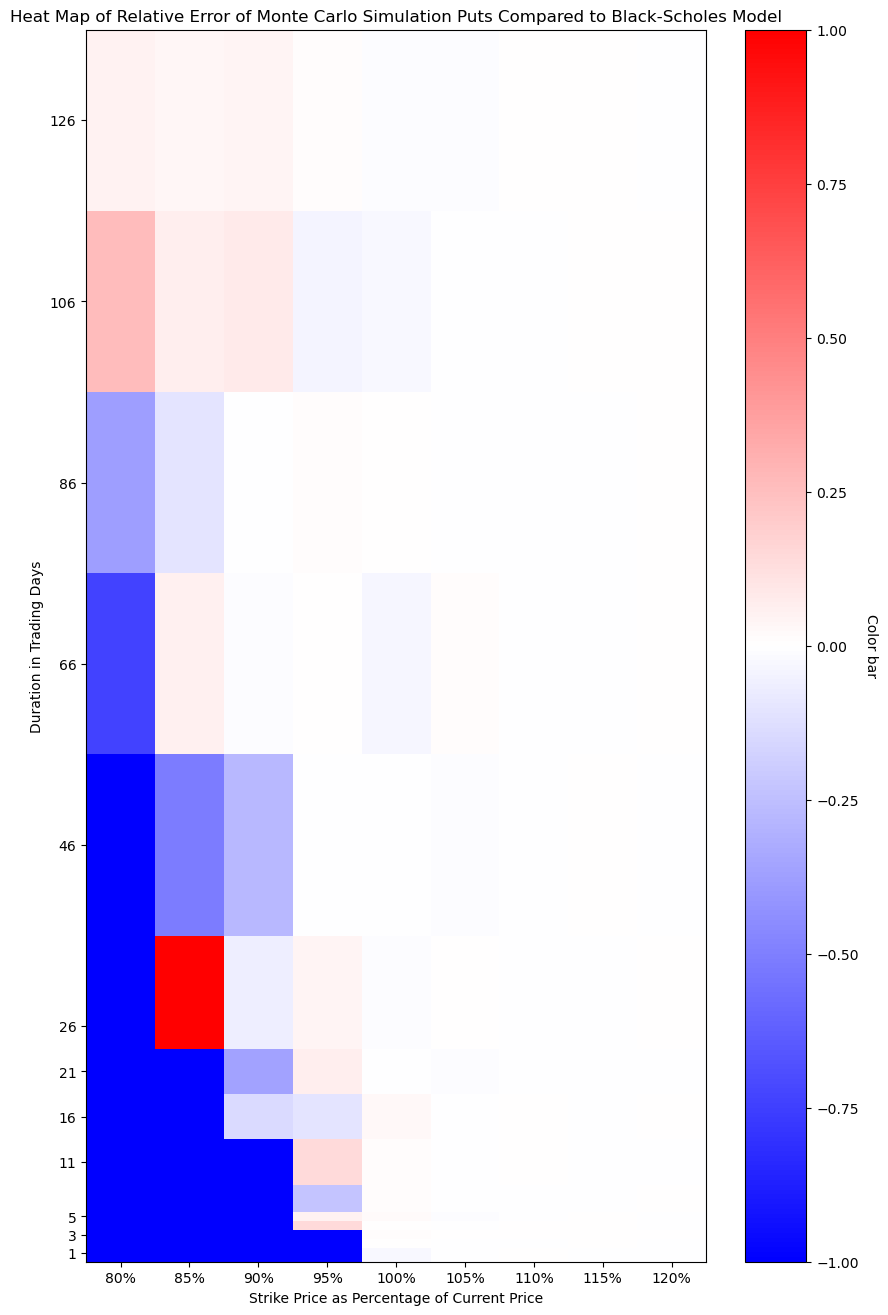

In [9]:
# Creating heatmap to show difference in relative error for combinations of duration and strike price
# Heatmap color bar taken from Python Charts, Heat Map in Matplotlib (https://python-charts.com/correlation/heatmap-matplotlib/)
strike_prices = prices_call.columns
duration_edges = np.array([0, 1.5, 2.5, 3.5, 4.5, 5.5, 8.5, 13.5, 18.5, 23.5, 36, 56, 76, 96, 116, 136])
strike_edges = np.array([0.775 , 0.825, 0.875, 0.925, 0.975, 1.025, 1.075, 1.125, 1.175, 1.225])

# Calculating relative error of MCS pricing vs BSM pricing and formatting into a DataFrame then array
relative_error_calls = pd.DataFrame(index=durations, columns=strike_prices)
for duration in durations:
    for strike_price in strike_prices:
        mc = prices_call.at[duration, strike_price][1]
        bsm = prices_call.at[duration, strike_price][0]
        relative_error_calls.at[duration, strike_price] = (mc - bsm) / bsm
        
relative_error_puts = pd.DataFrame(index=durations, columns=strike_prices)
for duration in durations:
    for strike_price in strike_prices:
        mc = prices_put.at[duration, strike_price][1]
        bsm = prices_put.at[duration, strike_price][0]
        relative_error_puts.at[duration, strike_price] = (mc - bsm) / bsm
relative_error_puts.to_csv("putdata.csv")

# Cleaning data to mitigate floating point error and non-meaningful data points
# To remedy floating point error, error data is rounded to 4 decimals
relative_error_calls = np.round(relative_error_calls, 4)
relative_error_puts = np.round(relative_error_puts, 4)

# To eliminate unmeaningful points, a reasonable threshold of [-1,1] is set
for duration in durations:
    for strike_price in strike_prices:
        if relative_error_calls.at[duration, strike_price] > 1:
            relative_error_calls.at[duration, strike_price] = 1
        elif relative_error_calls.at[duration, strike_price] < -1:
            relative_error_calls.at[duration, strike_price] = -1
        if relative_error_puts.at[duration, strike_price] > 1:
            relative_error_puts.at[duration, strike_price] = 1
        elif relative_error_puts.at[duration, strike_price] < -1:
            relative_error_puts.at[duration, strike_price] = -1

# Converting cleaned error data to array for heatmap data
heatmap_data_calls = relative_error_calls.values.astype(float)
heatmap_data_puts = relative_error_puts.values.astype(float)
vmax = max(np.amax(np.abs(heatmap_data_calls)), np.amax(np.abs(heatmap_data_puts)))

# Labels
xlabs = ["80%", "85%", "90%", "95%", "100%", "105%", "110%", "115%", "120%"]
ylabs = [1, 3, 5, 11, 16, 21, 26, 46, 66, 86, 106, 126]

# Call heatmap
fig, ax = plt.subplots(figsize = (10,16))
htcall = plt.pcolormesh(strike_edges, duration_edges, heatmap_data_calls, cmap='bwr', vmin = -vmax, vmax = vmax)
ax.set_xlim(strike_edges[0], strike_edges[-1])
ax.set_ylim(duration_edges[0], duration_edges[-1])
ax.set_xticks([0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2], labels = xlabs)
ax.set_yticks(ylabs, labels = ylabs)
ax.set_aspect('auto')
plt.xlabel("Strike Price as Percentage of Current Price")
plt.ylabel("Duration in Trading Days")
plt.title("Heat Map of Relative Error of Monte Carlo Simulation Calls Compared to Black-Scholes Model")
plt.rcParams.update({'font.size': 10})
cbar = fig.figure.colorbar(htcall, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")
plt.show();

# Put heatmap
fig, ax = plt.subplots(figsize = (10,16));
htput = plt.pcolormesh(strike_edges, duration_edges, heatmap_data_puts, cmap='bwr', vmin = -vmax, vmax = vmax)
ax.set_xticks([0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2], labels = xlabs)
ax.set_yticks(ylabs, labels = ylabs)
ax.set_aspect('auto')
ax.set_xlim(strike_edges[0], strike_edges[-1])
ax.set_ylim(duration_edges[0], duration_edges[-1])
plt.xlabel("Strike Price as Percentage of Current Price")
plt.ylabel("Duration in Trading Days")
plt.title("Heat Map of Relative Error of Monte Carlo Simulation Puts Compared to Black-Scholes Model")
plt.rcParams.update({'font.size': 10})
cbar = fig.figure.colorbar(htput, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")
plt.show();

Examining the heat plots for the call and put option prices, an interesting discovery is made: in most of the plot, error is negligeable, but in the bottom right corner for calls and the bottom left corner for puts, **the Monte Carlo estimate is meaningfully different from the Black-Scholes value.** In both of these cases, the **option is deep out of the money.** For calls, an option with a short expiration and a high strike price, i.e. in the bottom right corner of the heat plot, is not expected to be in the money. For a call option to be in the money, the price of the asset needs to exceed the strike price; a stock's price is not expected to suddenly increase by 10 or 20 percent in a short duration, therefore it is more than likely call options in the bottom right corner will be out of the money. Similarly, the section with the most error in the puts heat map is the most out of the money. For a put option to end in the money, the strike price needs to exceed the current price. Once again, the price of a stock is not expected to drop 10 or 20 percent in a few days, so it is likely that put options in the bottom left will end out of the money. The reason why these regions display such great error is that the **Monte Carlo simulation estimates the value of the option to be 0, while the Black-Scholes model predicts an extremely small number,** thus the error is equal to $\frac{0-\epsilon}{\epsilon}$ which is **$-1$.** All of the options in these regions are **extremely out of the money, so it is unlikely an informed investor would purchase them and the error is not impactful for the model.** In other words, the Monte Carlo simulation is effective for estimating the prices of reasonable options.

## Graphs and Interpretations of Greeks

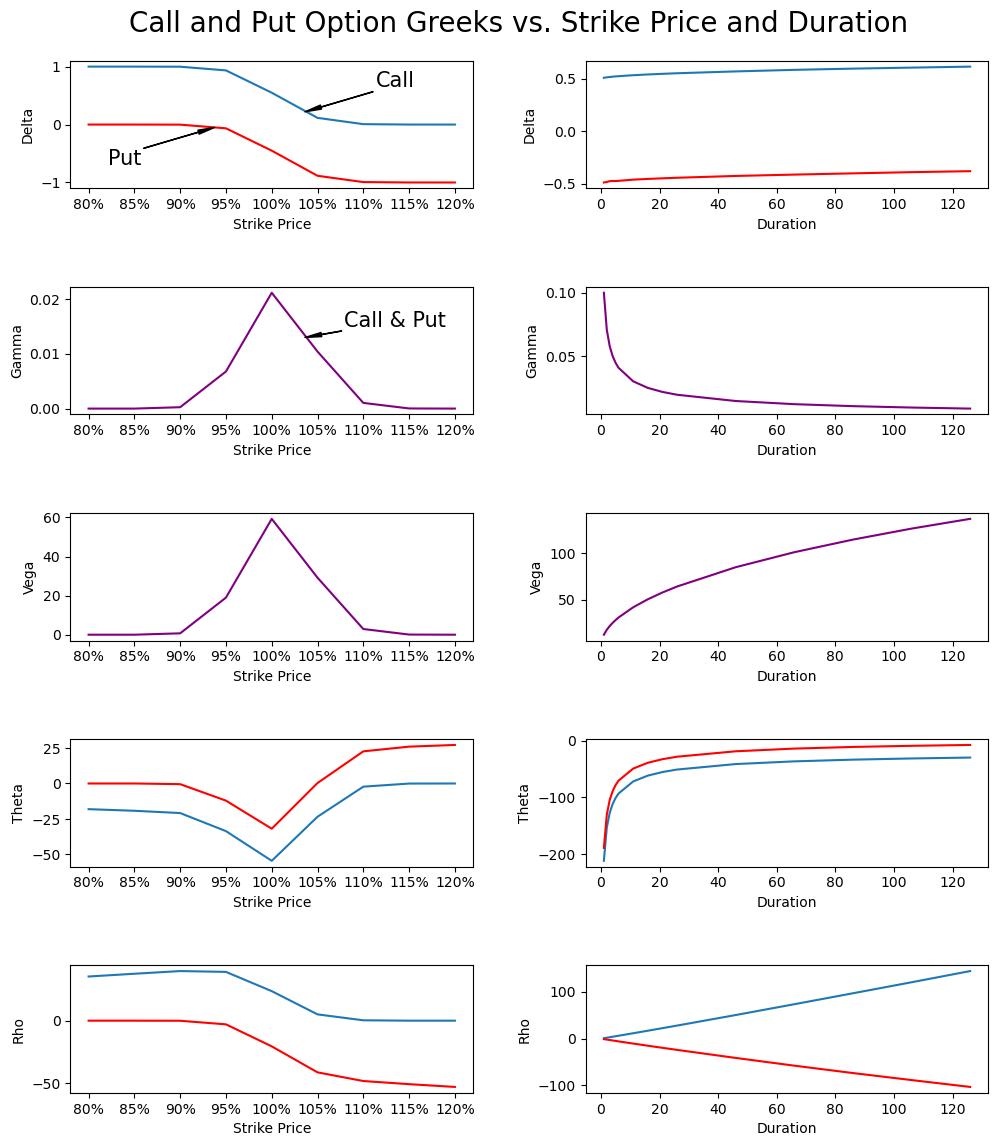

In [10]:
# Graphing the greeks as strike-price and duration change
current_price = yf.Ticker("MSFT").history(interval = "1m", period = "1d")["Close"].iloc[-1]
xlabs = ["80%", "85%", "90%", "95%", "100%", "105%", "110%", "115%", "120%"]

# Strike prices will range from 80-120% of the current price in increments of 5%
strike_prices = [round(x/100 * current_price, 4) for x in range(80, 125, 5)]

# Durations will be split into 3 types: short-term, medium-term, and long-term
# Short-term: 1-5 trading days
durations = list(range(1,6))

# Medium-term: 1-4 weeks
durations = durations + list(range(6,22,5))

# Long-term: 1-6 Months
durations = durations + list(range(26, 127, 20))

# Calculating greek data for various strike_prices 
greeks_str_calls = [greeks("MSFT", strike_price, 22, "call") for strike_price in strike_prices]
greeks_str_puts = [greeks("MSFT", strike_price, 22, "put") for strike_price in strike_prices]

# Calculating greek data for various durations
greeks_dur_calls = [greeks("MSFT", current_price, duration, "call") for duration in durations]
greeks_dur_puts = [greeks("MSFT", current_price, duration, "put") for duration in durations]

# Graphing data
fig, axs = plt.subplots(5, 2, figsize = (11,12))
fig.tight_layout(pad=5.0)
fig.suptitle("Call and Put Option Greeks vs. Strike Price and Duration", fontsize=20)

# Subplots 1-5: greeks vs. strike price
ax = plt.subplot(5, 2, 1)
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_calls[i]["delta"] for i in range(len(greeks_str_calls))], label = "call")
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_puts[i]["delta"] for i in range(len(greeks_str_calls))], c = "r", label = "put")
plt.xlabel("Strike Price")
plt.ylabel("Delta")
plt.annotate("Call", xy = (525, 0.22), fontsize =15, xytext = (575, 0.65), arrowprops = dict(facecolor = 'black', width = 0.2, headwidth = 3), horizontalalignment = 'center')
plt.annotate("Put", xy = (475, -0.05), fontsize =15, xytext = (425, -0.7), arrowprops = dict(facecolor = 'black', width = 0.2, headwidth = 3), horizontalalignment = 'center')
ax.set_xticks(strike_prices, labels = xlabs)

ax = plt.subplot(5, 2, 3)
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_calls[i]["gamma"] for i in range(len(greeks_str_calls))], c = "purple", label = "call and put")
plt.xlabel("Strike Price")
plt.ylabel("Gamma")
plt.annotate("Call & Put", xy = (525, 0.013), fontsize =15, xytext = (575, 0.015), arrowprops = dict(facecolor = 'black', width = 0.2, headwidth = 3), horizontalalignment = 'center')
ax.set_xticks(strike_prices, labels = xlabs)

ax = plt.subplot(5, 2, 5)
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_calls[i]["vega"] for i in range(len(greeks_str_calls))], c = "purple", label = "call and put")
plt.xlabel("Strike Price")
plt.ylabel("Vega")
ax.set_xticks(strike_prices, labels = xlabs)

ax = plt.subplot(5, 2, 7)
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_calls[i]["theta"] for i in range(len(greeks_str_calls))], label = "call")
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_puts[i]["theta"] for i in range(len(greeks_str_calls))], c = "r", label = "put")
plt.xlabel("Strike Price")
plt.ylabel("Theta")
ax.set_xticks(strike_prices, labels = xlabs)

ax = plt.subplot(5, 2, 9)
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_calls[i]["rho"] for i in range(len(greeks_str_calls))], label = "call")
plt.plot([strike_price for strike_price in strike_prices], [greeks_str_puts[i]["rho"] for i in range(len(greeks_str_calls))], c = "r", label = "put")
plt.xlabel("Strike Price")
plt.ylabel("Rho")
ax.set_xticks(strike_prices, labels = xlabs)

# Subplots 6-10: greeks vs. durations 
ax = plt.subplot(5, 2, 2)
plt.plot([duration for duration in durations], [greeks_dur_calls[i]["delta"] for i in range(len(greeks_dur_calls))], label = "call")
plt.plot([duration for duration in durations], [greeks_dur_puts[i]["delta"] for i in range(len(greeks_dur_calls))], c = "r", label = "put")
plt.xlabel("Duration")
plt.ylabel("Delta")

ax = plt.subplot(5, 2, 4)
plt.plot([duration for duration in durations], [greeks_dur_calls[i]["gamma"] for i in range(len(greeks_dur_calls))], label = "call and put", c = "purple")
plt.xlabel("Duration")
plt.ylabel("Gamma")

ax = plt.subplot(5, 2, 6)
plt.plot([duration for duration in durations], [greeks_dur_calls[i]["vega"] for i in range(len(greeks_dur_calls))], label = "call and put", c = "purple")
plt.xlabel("Duration")
plt.ylabel("Vega")

ax = plt.subplot(5, 2, 8)
plt.plot([duration for duration in durations], [greeks_dur_calls[i]["theta"] for i in range(len(greeks_dur_calls))], label = "call")
plt.plot([duration for duration in durations], [greeks_dur_puts[i]["theta"] for i in range(len(greeks_dur_calls))], label = "put", c = "r")
plt.xlabel("Duration")
plt.ylabel("Theta")

ax = plt.subplot(5, 2, 10)
plt.plot([duration for duration in durations], [greeks_dur_calls[i]["rho"] for i in range(len(greeks_dur_calls))], label = "call")
plt.plot([duration for duration in durations], [greeks_dur_puts[i]["rho"] for i in range(len(greeks_dur_calls))], label = "put", c = "r")
plt.xlabel("Duration")
plt.ylabel("Rho");

Finally, the option greeks are plotted against strike price and duration. The data in the graphs is as expected and suggests the greeks calculating function is effective.

### Strike Price:
- **Delta**: As the strike price of the call option increases, the magnitude of delta decreases. Conversely, the magnitude of delta for the put option increases. This is consistent with the definition of delta presented in the introduction because **the magnitude of delta approximates the probability of ending in the money.** Call options with a high strike price are unlikely to expire in the money, but put options with high strike prices are expected to expire in the money.
- **Gamma**: The graph of gamma show a spike at the current price and decreases as the strike price deviates from the current price. **Gamma reflects the how quickly delta will change as the stock price changes,** so it is expected that gamma will be greatest for at the money options. An option is said to be at the money when the strike price is approximately equal to the current price so it is expected that there will be a **spike when the current price equals the strike price.**
- **Vega:** Vega measures an option's sensitivity to change in volatility. It is the **same for call and put options** and is greatest when the **outcome of the option is most uncertain,** i. e. at the money. Similarly to the graph of gamma, vega spikes at the current price: when the option is at the money.
- **Theta:** Theta is a measure of how much an option depreciates (or appreciates) with time. It is **lowest for at the money options,** explaining the minimums for both call and put options when the strike price is the current price.
- **Rho:** Like delta, the magnitude of rho is greatest for options **in the money and lowest for options out of the money.** Rho measures how the value of an option changes as the risk-free rate does. The magnitude of rho is shown to decrease for call options, but increase for put options when the strike price increases, consistent with the definition of rho.

### Duration:
- **Delta:** The magnitude of delta is shown to increase for call options and decrease for put options as the duration of the option increases. **The market as a whole trends upwards,** so it is expected that in the long-term the value of a stock will increase with the market. As such, the probability of a call option ending in the money, where the current price of the stock at expiration exceeds the strike price, increases as duration increases. Conversely, the probability of a put option ending in the money decreases as duration increases. Since the magnitude of delta approximates the probability of an option ending in the money, it follows that as duration increases, the delta for a call option will increase and it will decrease for a put option.
- **Gamma:** Gamma is **most pronounced for at the money options.** As shown in the graph of delta vs. duration, when strike price equals current price, it is most expected to end at the money when duration is low. Therefore, it is expected that gamma will decrease as duration increases. 
- **Vega:** Once again, vega increases as the uncertainty of an option's outcome increases. **As duration increases, uncertainty increases.** This is best demonstrated by the Monte Carlo graph where **the spread of the prices increases as the days increase.** As such, it can be expected that vega will increase as duration increases.
- **Theta:** Theta is **lowest as an option approaches expiration.** As duration decreases, an option approaches its expiration and theta decreases.
- **Rho:** It can be expected that changes in the risk-free rate will impact options with longer durations more since they are **in the market longer.** Therefore, the magnitude of rho increases as duration does.

# Discussion

## Limitations
As touched on during the introduction, the Black-Scholes model relies on a number of simplifications to function. Often times, **these simplifications are not accurate representations of market conditions.** Most importantly, the Black-Scholes model assumes **volatility to be constant** and requires outside **predictions of implied volatility** in its inputs. Since volatility, like most aspects of the market, is always changing, this simplification considerably impacts the accuracy of the model. Another limitation of both the Monte Carlo simulation and the Black-Scholes model is that both assume that **stock prices follow geometric Brownian motion** when in some cases they do not. Finally, the Monte Carlo simulation was shown to possibly undervalue options that were extremely out of the money.

## Interpretation of Results
Overall, **the results of the Black-Scholes model and Monte Carlo simulation were as expected.** The greeks plotting reinforced the predictions made in the introduction section and the **Monte Carlo simulation closely followed the Black-Scholes model for most trials.** As mentioned before, there was considerable error for deep out of the money options, but this error is not particularly notable because these options are extremely unlikely to end in the money and thus an objectively poor investment. For many of these strike price-duration combinations, the Monte Carlo simulation with 10,000 simulated pathways yielded a **payoff of 0, indicating that not a single pathway ended in the money.** Additionally, the Monte Carlo simulation is found to converge with the Black-Scholes model as the number of trials increases, so the error is ultimately inconsequential. Initially there were some confusing results in the greeks graph, namely that the magnitude of rho increases for put options as duration increases, even though the option was less in the money. Investigating further, delta hardly changes for both options as the duration increases, so the effect of duration on rho was likely greater than delta. **The consistency of the greeks with the predictions highlights the accuracy of the function.**

## Practical Applications
The Black-Scholes model and Monte Carlo simulation have long served as reliable ways to value an option. Often times, **the Black-Scholes model is more convenient to use in simple cases**, where its assumptions generally hold, because it is much quicker to run and more definite. On the other hand, **when the assumptions of the Black-Scholes model are violated, such as when there are dividends or clearly non-constant volatility, the Monte Carlo simulation can prove useful** in practically simulating possible pathways. While there are superior models in place now, the Black-Scholes model and Monte Carlo simulation still hold their weight in option pricing.

## Extensions
Some extensions of this project could include **creating a hedge against various variables with the greeks, accounting for changing volatility, and expanding the scope of the project to include American options.** Using the values of the option greeks for various options, the impact of certain variables such as volatility, and change in stock price could be minimized. **Strategies like greek hedging are important in minimizing risk and protecting a portfolio from uncertainty.** In order to address the shortcomings of the Monte Carlo simulation and Black-Scholes model, a different model such as a **Binomial Tree could be used.** The Binomial Tree is essentially a combination of the Black-Scholes model and a Monte Carlo simulation where a stock is assumed to only move up or down a certain amount in a timeframe. By optimizing the payoff function for early exercise, models such as the Binomial Tree can be extended to price American options. **Ultimately, model choice should be driven by market context and computation resources, and it is important to compare models to improve accuracy.**

